In [1]:
# Gerekli kütüphaneler (Yüklü değilse ilk satırı çalıştır)
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP için ek kütüphaneler
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# CSV dosyasını oku
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Sütun adlarını kontrol et
print(df.columns)

# Genellikle veri şu sütunlara sahip oluyor:
# ['v1', 'v2', ...]  --> v1: label, v2: message

# Temiz veri çerçevesi oluştur
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.head()


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def clean_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # Sadece harf ve boşluk bırak
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Fazla boşlukları kaldır
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()
# Metin Temizleme (Ön İşleme)

,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [5]:
# Label Encode (Etiketleri 0-1'e Çevirme)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df[['label', 'label_num']].head()

,label,label_num
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


In [6]:
# Train/Test Split

X = df['clean_text']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Eğitim veri sayısı:", len(X_train))
print("Test veri sayısı:", len(X_test))


Eğitim veri sayısı: 4457
Test veri sayısı: 1115


In [7]:
# Metni Vektörleştirme (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Vektörleşmiş eğitim verisinin şekli:", X_train_tfidf.shape)


Vektörleşmiş eğitim verisinin şekli: (4457, 7522)


In [8]:
# Şimdi Naive Bayes modelini eğitelim.
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [9]:
# Tahmin ve Sonuçlar

y_pred = model.predict(X_test_tfidf)

print("Doğruluk oranı:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# # Modeli test setinde deneyelim ve başarı oranına bakalım.

y_pred = model.predict(X_test_tfidf)

print("Doğruluk oranı:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Doğruluk oranı: 0.9524663677130045
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       1.00      0.65      0.79       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Doğruluk oranı: 0.9524663677130045
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       1.00      0.65      0.79       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [10]:
# Tüm Mesajlardan Kelime Frekanslarını Saymak
from collections import Counter

# Tüm temizlenmiş mesajları birleştir
all_words = ' '.join(df['clean_text']).split()

# En çok geçen 20 kelimeyi bul
most_common_words = Counter(all_words).most_common(20)

# Sonuca bakalım
print(most_common_words)


[('to', 2240), ('i', 2239), ('you', 2124), ('a', 1433), ('the', 1323), ('u', 1143), ('and', 970), ('in', 887), ('is', 886), ('me', 786), ('my', 754), ('for', 705), ('your', 677), ('of', 621), ('it', 618), ('call', 579), ('have', 573), ('on', 535), ('that', 512), ('are', 489)]


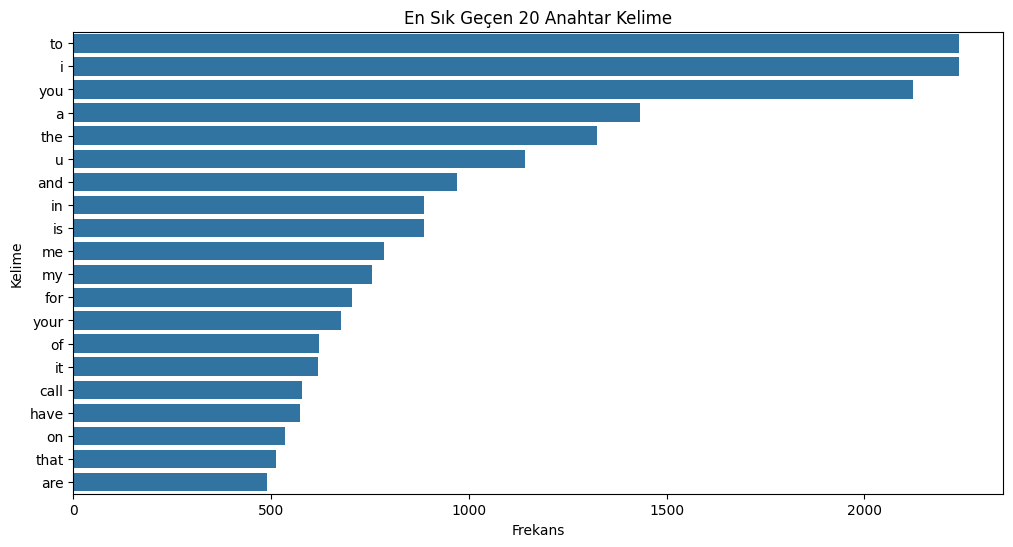

In [11]:
# Veri hazırlığı
words, counts = zip(*most_common_words)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), orient='h')
plt.title("En Sık Geçen 20 Anahtar Kelime")
plt.xlabel("Frekans")
plt.ylabel("Kelime")
plt.show()


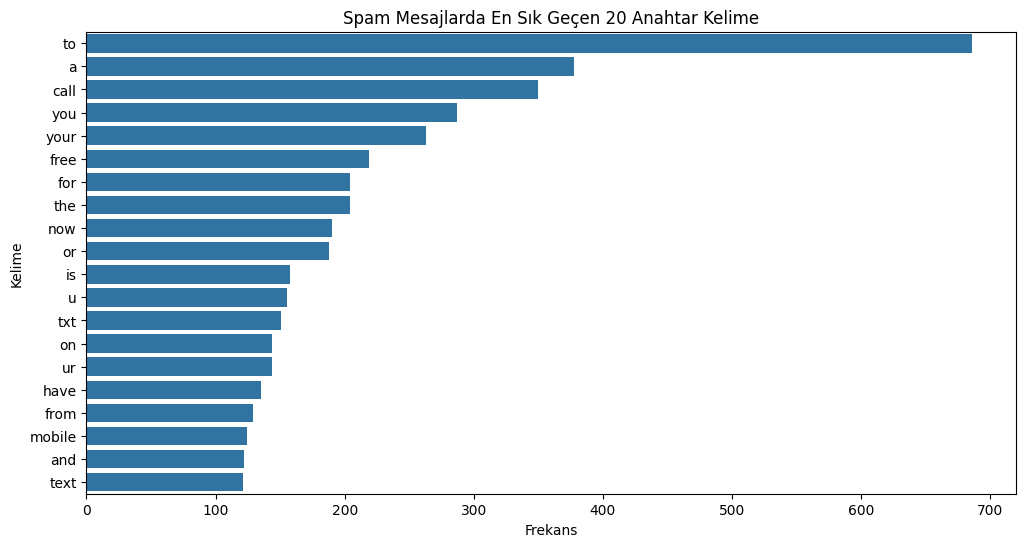

In [12]:
 # Sadece Spam Mesajlarda En Çok Geçen Kelimeler
spam_words = ' '.join(df[df['label_num'] == 1]['clean_text']).split()
spam_common = Counter(spam_words).most_common(20)

# Grafik
words_spam, counts_spam = zip(*spam_common)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts_spam), y=list(words_spam), orient='h')
plt.title("Spam Mesajlarda En Sık Geçen 20 Anahtar Kelime")
plt.xlabel("Frekans")
plt.ylabel("Kelime")
plt.show()


## Eğitim ve Model Kaydetme

In [1]:
import pandas as pd
import string
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Veri yükle
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')[['v1', 'v2']]
df.columns = ['label', 'message']

# Etiketleri sayısallaştır
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Train-test ayır
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# TF-IDF + Naive Bayes pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', lowercase=True)),
    ('clf', MultinomialNB())
])

# Eğit
model.fit(X_train, y_train)

# Tahmin ve rapor
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Modeli kaydet
joblib.dump(model, 'sms_spam_model.pkl')


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



['sms_spam_model.pkl']